In [1]:
%load_ext autoreload
%autoreload 2

%autosave 10

Autosaving every 10 seconds


This notebook demos synthetic signal generation

In [2]:
import sys
sys.path.append('../code/') # Make code in "tools" folder visible to python interpreter

import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette("Set2")
%matplotlib widget

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
    }
)

from matplotlib.colors import ListedColormap

plt.rcParams["image.cmap"] = ListedColormap(sns.color_palette(as_cmap=True))


from tools.data_generation import DataGenerator

In [3]:
Fs = 2048

In [4]:
base_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": None,
    "phase": None,
    "pac": None,
    "cross-pac": None,
    "phase_shift": None,
    "burst_length": None,
}

# Beta Gamma ERD / ERS

In [5]:
beta_gamma_cfg = {
    "betas": [0.8,0.2],
    "gammas": [0.3,0.7],
    "beta_sharpness": None,
    "phase": None,
    "pac": None,
    "cross_pac": None,
    "phase_shift": None,
    "burst_length": None,
}

In [6]:
data = DataGenerator(beta_gamma_cfg, 1000, Fs=Fs)

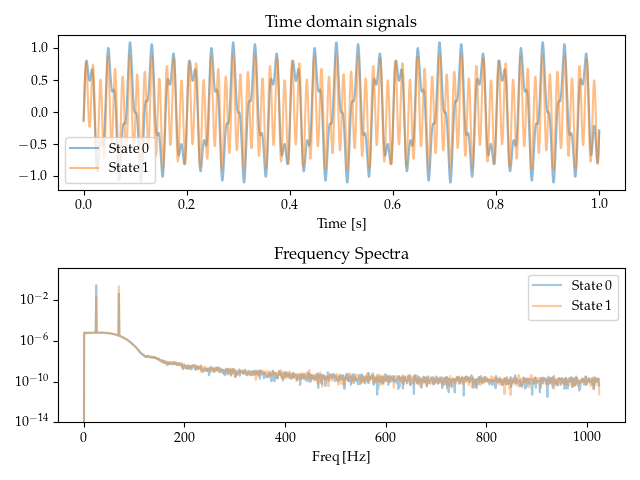

In [7]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[0,idx-Fs:idx]
signal1 = data.signals[0,idx:idx+Fs]

t = np.linspace(0,1,signal0.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,signal0, alpha=0.5, label = 'State 0')
ax[0].plot(t,signal1, alpha=0.5, label = 'State 1')
ax[0].legend()
ax[0].set_title("Time domain signals")
ax[0].set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0, fs=Fs)
f,Px_1 = signal.periodogram(signal1, fs=Fs)

ax[1].plot(f,Px_0, alpha = 0.4, label = 'State 0')
ax[1].plot(f,Px_1, alpha = 0.4, label = 'State 1')
ax[1].set_yscale('log')
ax[1].set_ylim(10e-15)
ax[1].legend()
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [8]:
data = DataGenerator(beta_gamma_cfg, 2, Fs=Fs)

/tmp/ipykernel_765721/4084066671.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/home/fernando/anaconda3/envs/test_env_3/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


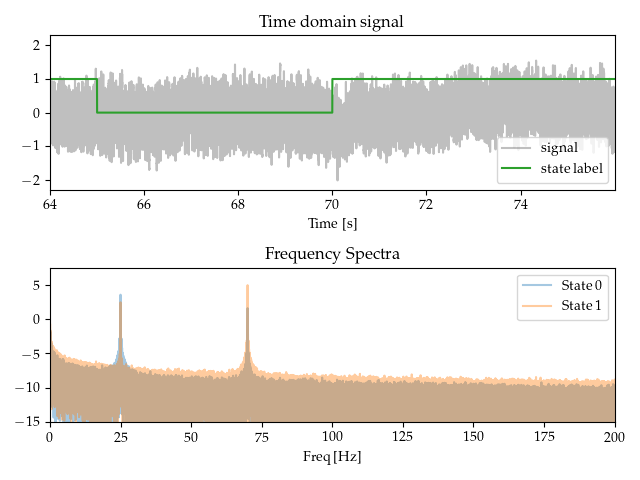

In [9]:
fig, ax = plt.subplots(2,1)

ax[0].plot(data.t, data.signals[0], label = 'signal', c='grey', alpha=0.5)
ax[0].plot(data.t, data.label, label = 'state label', c='C2')
ax[0].legend()
idx = np.where(np.diff(data.label))[0][4]

ax[0].set_xlim(data.t[idx - 6*Fs], data.t[idx + 6*Fs])
ax[0].set_title("Time domain signal")
ax[0].set_xlabel('Time [s]')


f,Px_1 = signal.periodogram(data.signals[0] * data.label.astype(float), fs=Fs)
f,Px_0 = signal.periodogram(data.signals[0] * np.logical_not(data.label).astype(float), fs=Fs)

ax[1].plot(f,np.log(Px_0),label='State 0', alpha = 0.4)
ax[1].plot(f,np.log(Px_1),label='State 1', alpha = 0.4)
ax[1].legend()
ax[1].set_ylim(-15,7.5)
ax[1].set_xlim(0,200)
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

# Beta waveform sharpness

In [10]:
beta_sharpness_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": [0.02, 0.98],
    "phase": None,
    "pac": None,
    "cross_pac": None,
    "phase_shift": None,
    "burst_length": None,
}

In [11]:
data = DataGenerator(beta_sharpness_cfg, 100, Fs=Fs)

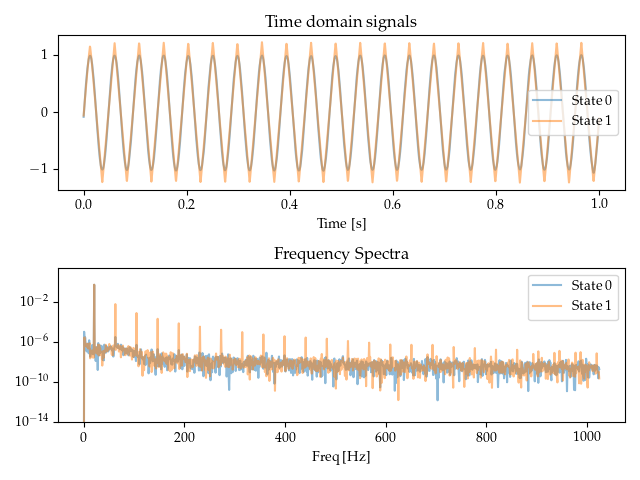

In [12]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[0,idx-Fs:idx]
signal1 = data.signals[0,idx:idx+Fs]

t = np.linspace(0,1,signal0.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,signal0, alpha=0.5, label = 'State 0')
ax[0].plot(t,signal1, alpha=0.5, label = 'State 1')
ax[0].legend()
ax[0].set_title("Time domain signals")
ax[0].set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0, fs=Fs)
f,Px_1 = signal.periodogram(signal1, fs=Fs)

ax[1].plot(f,Px_0, alpha = 0.5, label = 'State 0')
ax[1].plot(f,Px_1, alpha = 0.5, label = 'State 1')
ax[1].set_yscale('log')
ax[1].set_ylim(10e-15)
ax[1].legend()
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [13]:
data = DataGenerator(beta_sharpness_cfg, 2, Fs=Fs)

/tmp/ipykernel_765721/1019188081.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


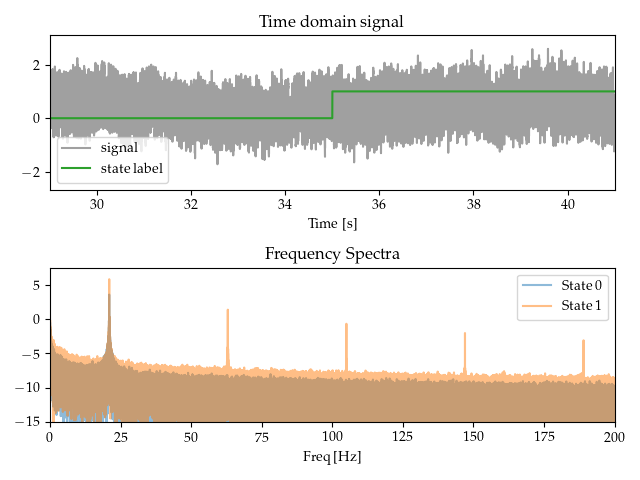

In [14]:
fig, ax = plt.subplots(2,1)

ax[0].plot(data.t, data.signals[0], label = 'signal', c='grey', alpha=0.75)
ax[0].plot(data.t, data.label, label = 'state label', c='C2')
ax[0].legend()
idx = np.where(np.diff(data.label))[0][4]

ax[0].set_xlim(data.t[idx - 6*Fs], data.t[idx + 6*Fs])
ax[0].set_title("Time domain signal")
ax[0].set_xlabel('Time [s]')

f,Px_1 = signal.periodogram(data.signals[0] * data.label.astype(float), fs=Fs)
f,Px_0 = signal.periodogram(data.signals[0] * np.logical_not(data.label).astype(float), fs=Fs)

ax[1].plot(f,np.log(Px_0),label='State 0', alpha = 0.5)
ax[1].plot(f,np.log(Px_1),label='State 1', alpha = 0.5)
ax[1].legend()
ax[1].set_ylim(-15,7.5)
ax[1].set_xlim(0,200)
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

# Phase distortion

In [15]:
phase_distortion_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": None,
    "phase": [0, 0.7],
    "pac": None,
    "cross_pac": None,
    "phase_shift": None,
    "burst_length": None,
}

In [16]:
data = DataGenerator(phase_distortion_cfg, 100, Fs=Fs)

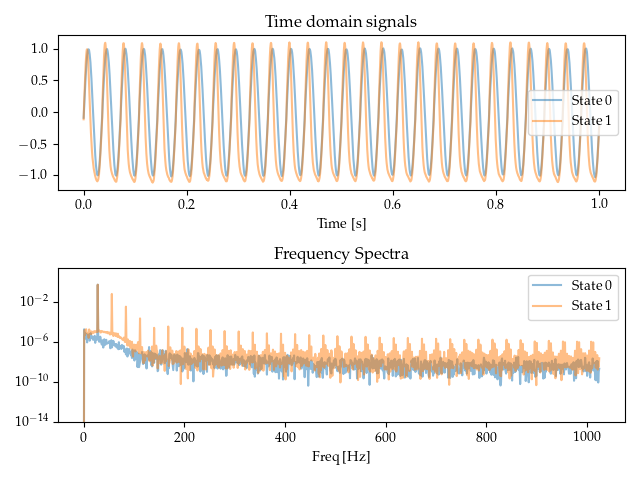

In [17]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[0,idx-Fs:idx]
signal1 = data.signals[0,idx:idx+Fs]

t = np.linspace(0,1,signal0.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,signal0, alpha=0.5, label = 'State 0')
ax[0].plot(t,signal1, alpha=0.5, label = 'State 1')
ax[0].legend()
ax[0].set_title("Time domain signals")
ax[0].set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0, fs=Fs)
f,Px_1 = signal.periodogram(signal1, fs=Fs)

ax[1].plot(f,Px_0, alpha = 0.5, label = 'State 0')
ax[1].plot(f,Px_1, alpha = 0.5, label = 'State 1')
ax[1].set_yscale('log')
ax[1].set_ylim(10e-15)
ax[1].legend()
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [18]:
data = DataGenerator(phase_distortion_cfg, 2, Fs=Fs)

/tmp/ipykernel_765721/3906097098.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/home/fernando/anaconda3/envs/test_env_3/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


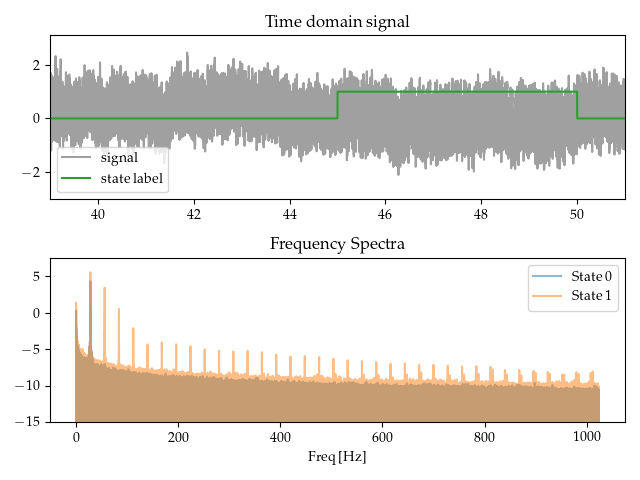

In [19]:
fig, ax = plt.subplots(2,1)

ax[0].plot(data.t, data.signals[0], label = 'signal', c='grey', alpha=0.75)
ax[0].plot(data.t, data.label, label = 'state label', c='C2')
ax[0].legend()
idx = np.where(np.diff(data.label))[0][4]

ax[0].set_xlim(data.t[idx - 6*Fs], data.t[idx + 6*Fs])
ax[0].set_title("Time domain signal")
ax[1].set_xlabel("Time [s]")

f,Px_1 = signal.periodogram(data.signals[0] * data.label.astype(float), fs=Fs)
f,Px_0 = signal.periodogram(data.signals[0] * np.logical_not(data.label).astype(float), fs=Fs)

ax[1].plot(f,np.log(Px_0),label='State 0', alpha = 0.5)
ax[1].plot(f,np.log(Px_1),label='State 1', alpha = 0.5)
ax[1].legend()
ax[1].set_ylim(-15,7.5)
#ax[1].set_xlim(0,200)
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

# Phase-amplitude coupling

In [20]:
pac_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": None,
    "phase": None,
    "pac": [0.0, 1.0],
    "cross_pac": None,
    "phase_shift": None,
    "burst_length": None,
}

In [21]:
data = DataGenerator(pac_cfg, 10000, Fs=Fs)

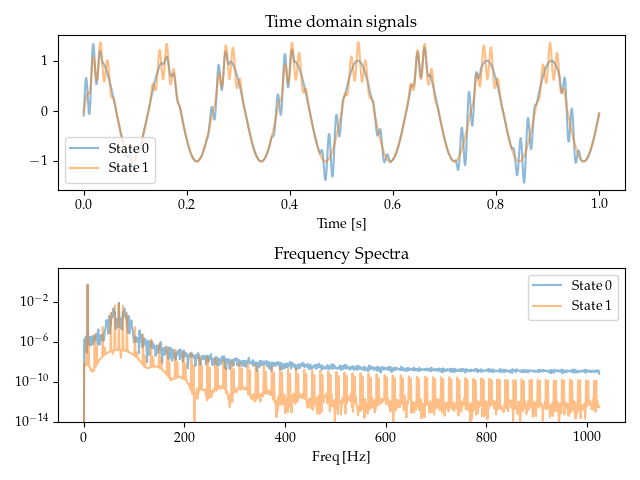

In [22]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[0,idx-Fs:idx]
signal1 = data.signals[0,idx:idx+Fs]

t = np.linspace(0,1,signal0.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,signal0, alpha=0.5, label = 'State 0')
ax[0].plot(t,signal1, alpha=0.5, label  = 'State 1')
ax[0].legend()
ax[0].set_title("Time domain signals")
ax[0].set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0, fs=Fs)
f,Px_1 = signal.periodogram(signal1, fs=Fs)

ax[1].plot(f,Px_0, alpha = 0.5, label = 'State 0')
ax[1].plot(f,Px_1, alpha = 0.5, label = 'State 1')
ax[1].set_yscale('log')
ax[1].set_ylim(10e-15)
ax[1].legend()
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [23]:
data = DataGenerator(pac_cfg, 2, Fs=Fs)

/tmp/ipykernel_765721/697543011.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/home/fernando/anaconda3/envs/test_env_3/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


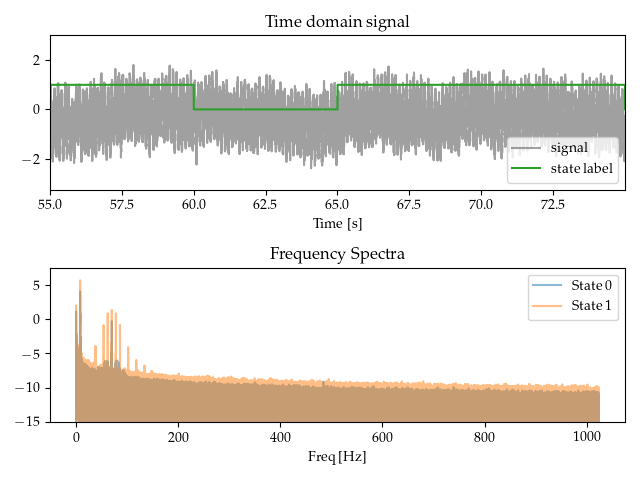

In [24]:
fig, ax = plt.subplots(2,1)

ax[0].plot(data.t, data.signals[0], label = 'signal', c='grey', alpha=0.75)
ax[0].plot(data.t, data.label, label = 'state label', c='C2')
ax[0].legend()
idx = np.where(np.diff(data.label))[0][4]

ax[0].set_xlim(data.t[idx - 10*Fs], data.t[idx + 10*Fs])
ax[0].set_title("Time domain signal")
ax[0].set_xlabel("Time [s]")

f,Px_1 = signal.periodogram(data.signals[0] * data.label.astype(float), fs=Fs)
f,Px_0 = signal.periodogram(data.signals[0] * np.logical_not(data.label).astype(float), fs=Fs)

ax[1].plot(f,np.log(Px_0),label='State 0', alpha = 0.5)
ax[1].plot(f,np.log(Px_1),label='State 1', alpha = 0.5)
ax[1].legend()
ax[1].set_ylim(-15,7.5)
#ax[1].set_xlim(0,200)
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

# Cross-channel PAC:

In [25]:
cross_pac_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": None,
    "phase": None,
    "pac": None,
    "cross_pac": [0.0, 1.0],
    "phase_shift": None,
    "burst_length": None,
}

In [26]:
data = DataGenerator(cross_pac_cfg, 10000, Fs=Fs)

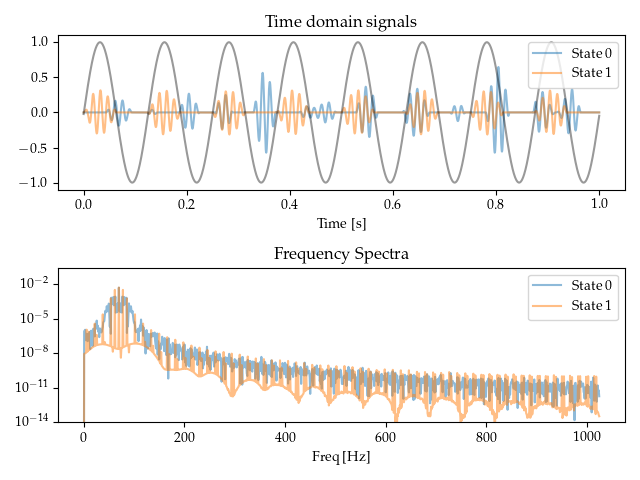

In [27]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[1,idx-Fs:idx]
signal1 = data.signals[1,idx:idx+Fs]

t = np.linspace(0,1,signal0.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,signal0, alpha=0.5, label = 'State 0')
ax[0].plot(t,signal1, alpha=0.5, label  = 'State 1')
ax[0].plot(t,data.signals[0,idx-Fs:idx],c='k', alpha=0.4)
ax[0].legend()
ax[0].set_title("Time domain signals")
ax[0].set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0, fs=Fs)
f,Px_1 = signal.periodogram(signal1, fs=Fs)

ax[1].plot(f,Px_0, alpha = 0.5, label = 'State 0')
ax[1].plot(f,Px_1, alpha = 0.5, label = 'State 1')
ax[1].set_yscale('log')
ax[1].set_ylim(10e-15)
ax[1].legend()
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [28]:
data = DataGenerator(cross_pac_cfg, 2, Fs=Fs)

/tmp/ipykernel_765721/4174649116.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


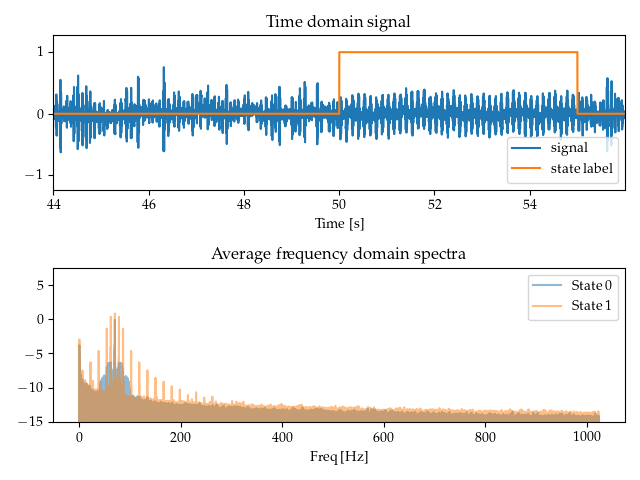

In [29]:
fig, ax = plt.subplots(2,1)

ax[0].plot(data.t, data.signals[1], label = 'signal')
ax[0].plot(data.t, data.label, label = 'state label')
ax[0].legend()
idx = np.where(np.diff(data.label))[0][4]

ax[0].set_xlim(data.t[idx - 6*Fs], data.t[idx + 6*Fs])
ax[0].set_title("Time domain signal")
ax[0].set_xlabel("Time [s]")

f,Px_1 = signal.periodogram(data.signals[1] * data.label.astype(float), fs=Fs)
f,Px_0 = signal.periodogram(data.signals[1] * np.logical_not(data.label).astype(float), fs=Fs)

ax[1].plot(f,np.log(Px_0),label='State 0', alpha = 0.5)
ax[1].plot(f,np.log(Px_1),label='State 1', alpha = 0.5)
ax[1].legend()
ax[1].set_ylim(-15,7.5)
#ax[1].set_xlim(0,200)
ax[1].set_title("Average frequency domain spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [30]:
plt.close('all')

# Phase-shift


Changing phase relationships between oscillations of random frequencies in two channels

In [31]:
phase_shift_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": None,
    "phase": None,
    "pac": None,
    "cross_pac": None,
    "phase_shift": [0.1, 0.6],
    "burst_length": None,
}

In [32]:
data = DataGenerator(phase_shift_cfg, 10000, Fs=Fs)

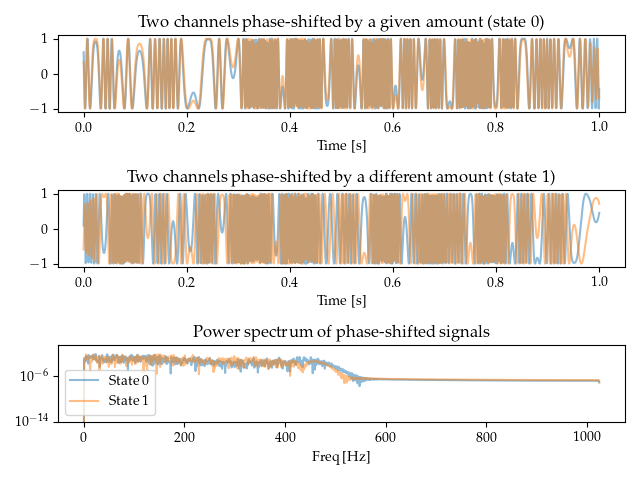

In [33]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[:,idx-Fs:idx]
signal1 = data.signals[:,idx:idx+Fs]

t = np.linspace(0,1,signal0.shape[1])

fig, ax = plt.subplots(3,1)
ax[0].plot(t,signal0[0], alpha=0.5, label = 'State 0')
ax[0].plot(t,signal0[1], alpha=0.5, label = 'State 0')
ax[0].set_title('Two channels phase-shifted by a given amount (state 0)')

ax[1].plot(t,signal1[0], alpha=0.5, label = 'State 0')
ax[1].plot(t,signal1[1], alpha=0.5, label = 'State 0')
ax[1].set_title('Two channels phase-shifted by a different amount (state 1)')

for ax_ in ax[:2]:
    ax_.set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0[1], fs=Fs)
f,Px_1 = signal.periodogram(signal1[1], fs=Fs)

ax[2].plot(f,Px_0, alpha = 0.5, label = 'State 0')
ax[2].plot(f,Px_1, alpha = 0.5, label = 'State 1')
ax[2].set_title('Power spectrum of phase-shifted signals')
ax[2].set_xlabel("Freq [Hz]")
ax[2].legend()
ax[2].set_yscale('log')
ax[2].set_ylim(10e-15)

fig.tight_layout()

# Burst length:

Transient beta is equated for total power but presents in bursts of different lenghts.

In [34]:
burst_len_cfg = {
    "betas": None,
    "gammas": None,
    "beta_sharpness": None,
    "phase": None,
    "pac": None,
    "cross_pac": None,
    "phase_shift": None,
    "burst_length": [0.05, 0.9],
}

In [35]:
data = DataGenerator(burst_len_cfg, 10000, Fs=Fs)

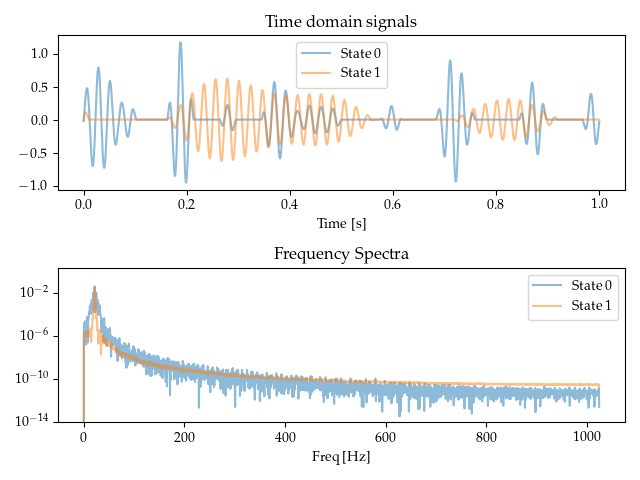

In [36]:
idx = np.where(np.diff(data.label))[0][4]

signal0 = data.signals[0,idx-2*Fs:idx]
signal1 = data.signals[0,idx:idx+2*Fs]

t = np.linspace(0,1,signal0.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,signal0, alpha=0.5, label = 'State 0')
ax[0].plot(t,signal1, alpha=0.5, label  = 'State 1')
ax[0].legend()
ax[0].set_title("Time domain signals")
ax[0].set_xlabel('Time [s]')

f,Px_0 = signal.periodogram(signal0, fs=Fs)
f,Px_1 = signal.periodogram(signal1, fs=Fs)

ax[1].plot(f,Px_0, alpha = 0.5, label = 'State 0')
ax[1].plot(f,Px_1, alpha = 0.5, label = 'State 1')
ax[1].set_yscale('log')
ax[1].set_ylim(10e-15)
ax[1].legend()
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()

In [37]:
data = DataGenerator(burst_len_cfg, 2, Fs=Fs)

/tmp/ipykernel_765721/351369781.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/home/fernando/anaconda3/envs/test_env_3/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


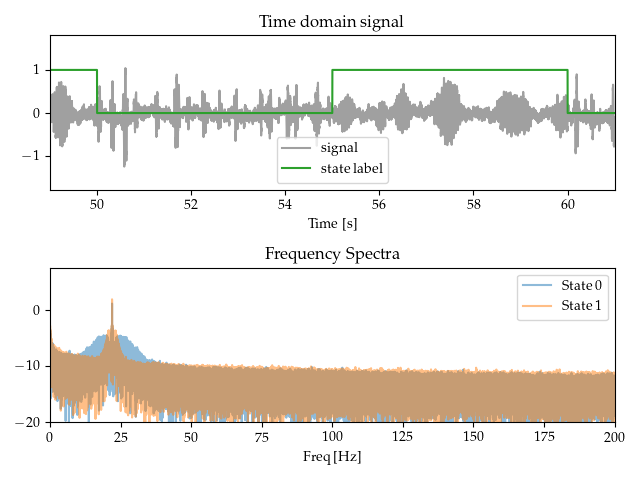

In [38]:
fig, ax = plt.subplots(2,1)

ax[0].plot(data.t, data.signals[0], label = 'signal', c='grey', alpha=0.75)
ax[0].plot(data.t, data.label, label = 'state label', c='C2')
ax[0].legend()
idx = np.where(np.diff(data.label))[0][4]

ax[0].set_xlim(data.t[idx - 6*Fs], data.t[idx + 6*Fs])
ax[0].set_title("Time domain signal")
ax[0].set_xlabel("Time [s]")

f,Px_1 = signal.periodogram(data.signals[0] * data.label.astype(float), fs=Fs)
f,Px_0 = signal.periodogram(data.signals[0] * np.logical_not(data.label).astype(float), fs=Fs)

ax[1].plot(f,np.log(Px_0),label='State 0', alpha = 0.5)
ax[1].plot(f,np.log(Px_1),label='State 1', alpha = 0.5)
ax[1].legend()
ax[1].set_ylim(-20,7.5)
ax[1].set_xlim(0,200)
ax[1].set_title("Frequency Spectra")
ax[1].set_xlabel("Freq [Hz]")

fig.tight_layout()